In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/flights.csv')

# Display the first few lines
df.head()


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [11]:
# find all the null values and replace them
null_values = df.isnull()

# replace the null values with 0
df.fillna(0, inplace=True)

# normalize the data by removing outliers

# Calculate the z-scores of DepDelay and ArrDelay
z_scores = (df[['DepDelay', 'ArrDelay']] - df[['DepDelay', 'ArrDelay']].mean()) / df[['DepDelay', 'ArrDelay']].std()

# calculate the absolute z-scores
z_scores = z_scores.abs()

# get the rows with the outliers and remove them
outliers = z_scores[(z_scores['DepDelay'] > 3) | (z_scores['ArrDelay'] > 3)].index
df = df.drop(outliers)

# Display the first few lines
df.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


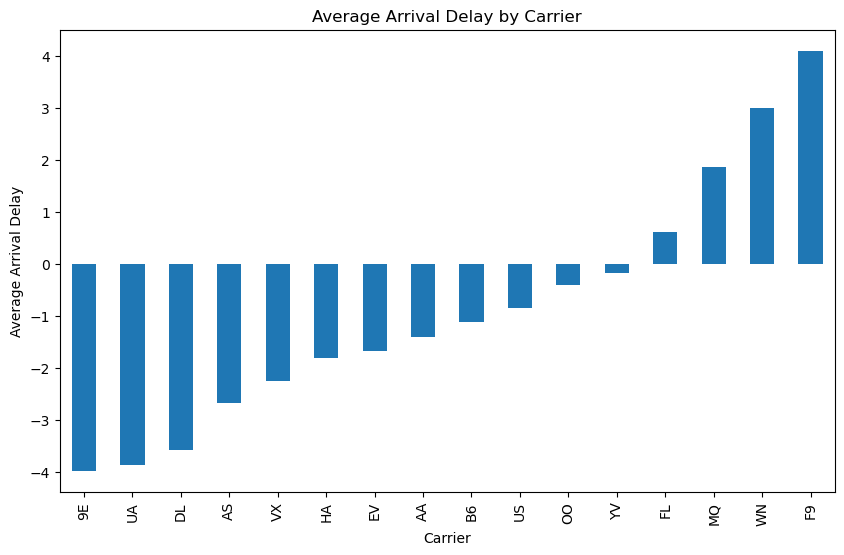

In [9]:
import matplotlib.pyplot as plt

# Calculate the average arrival delay by carrier and sort
avg_delay_by_carrier = df.groupby('Carrier')['ArrDelay'].mean().sort_values()

# Create a bar chart
avg_delay_by_carrier.plot(kind='bar', figsize=(10, 6))

# Set the title and labels
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Arrival Delay')

# Show the plot
plt.show()

q: what does CRSDepTime mean?
a: The scheduled departure time

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert 'DayOfWeek' and 'DestAirportID' to categorical variables
df['DayOfWeek'] = df['DayOfWeek'].astype('category')
df['DestAirportID'] = df['DestAirportID'].astype('category')

# Create 'IsDelayed' column
df['IsDelayed'] = df['ArrDel15'].apply(lambda x: 1 if x > 0 else 0)

# Define features and target
X = df[['DayOfWeek', 'DestAirportID']]
y = df['IsDelayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Logistic Regression model
model = LogisticRegression()

# Fit the model with the training data
model.fit(X_train, y_train)

# Predict the target for the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8619350139602638
